<a href="https://colab.research.google.com/github/kishorkumar098/Movie-recommandation/blob/main/google_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Upload the dataset

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving netflix_titles.csv to netflix_titles.csv


Load the Dataset

In [ ]:
import pandas as pd

df = pd.read_csv('/content/netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


Data Exploration

In [ ]:
df.info()
df.describe(include='all')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8807.000000,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,NaN,17,220,514,8775
top,s8807,Movie,Zubaan,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,NaN,3207,1793,362,4
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014.180198,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.819312,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019.000000,NaN,NaN,NaN,NaN


Check for Missing Values and Duplicates

In [ ]:
print(df.isnull().sum())
print("\nDuplicate Rows:", df.duplicated().sum())


show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

Duplicate Rows: 0


Visualize a Few Features

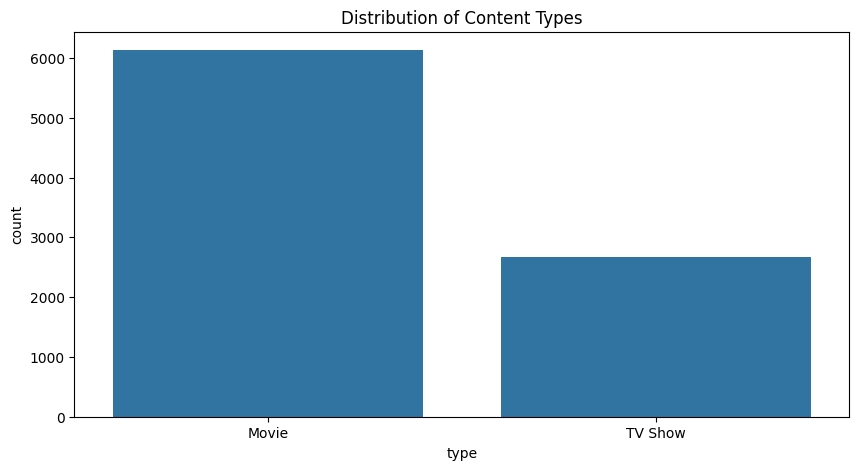

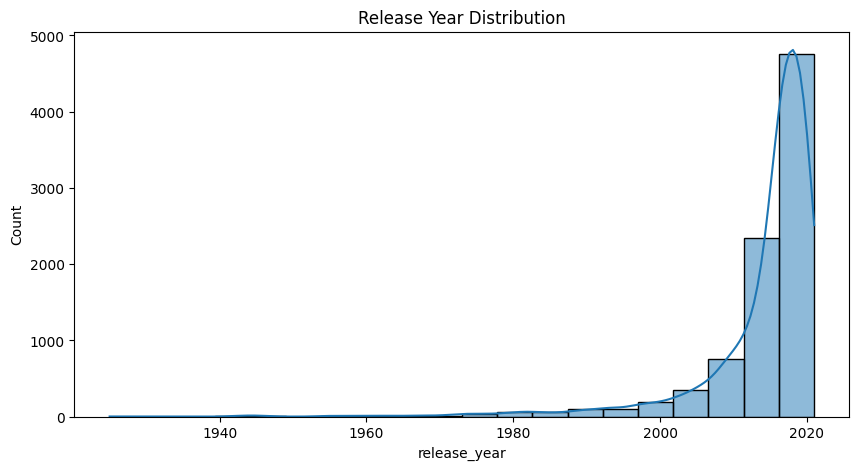

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
sns.countplot(data=df, x='type')
plt.title("Distribution of Content Types")
plt.show()

plt.figure(figsize=(10,5))
sns.histplot(df['release_year'], bins=20, kde=True)
plt.title("Release Year Distribution")
plt.show()


Identify Target and Features

In [ ]:
# This dataset doesn't have a traditional 'target' column.
# For example, we could try to predict the 'type' (Movie/TV Show) based on other features.
target = 'type'
features = df.drop(columns=['type', 'show_id', 'title', 'description'])


Convert Categorical Columns to Numerical

In [ ]:
df['date_added'] = pd.to_datetime(df['date_added'], format='mixed', errors='coerce')
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month
df = df.drop(columns=['date_added'])

One-Hot Encoding

In [ ]:
df_encoded = pd.get_dummies(df, columns=['rating', 'country', 'listed_in'], drop_first=True)

Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

# Step 1: Rename columns
df_encoded.rename(columns={
    'Year Added': 'year_added',
    'Month Added': 'month_added'
}, inplace=True)

# Step 2: Auto-detect numerical columns
numerical_cols = df_encoded.select_dtypes(include='number').columns

# Step 3: Scale numerical columns
scaler = StandardScaler()
df_encoded[numerical_cols] = scaler.fit_transform(df_encoded[numerical_cols])


Train-Test Split

In [ ]:
from sklearn.model_selection import train_test_split

X = df_encoded.drop(columns=['type'])
y = df['type']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Model Building

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Load your dataset
df = pd.read_csv('/content/netflix_titles.csv')  # Adjust path as needed

# Save target separately
target = df['type']

# Drop unnecessary columns
df = df.drop(columns=['show_id', 'title', 'description', 'cast', 'director', 'type'], errors='ignore')

# Convert date_added
df['date_added'] = pd.to_datetime(df['date_added'], format='mixed', errors='coerce')
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month
df = df.drop(columns=['date_added'])

# Drop rows with missing values in critical columns
df = df.dropna(subset=['rating', 'country', 'release_year'])

# Encode categorical features
df_encoded = pd.get_dummies(df, drop_first=True)

# Align target with the filtered DataFrame
target = target.loc[df_encoded.index].astype('category').cat.codes

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(df_encoded, target, test_size=0.2, random_state=42)

# Train model
model = RandomForestClassifier()
model.fit(X_train, y_train)



RandomForestClassifier()

Evaluation

In [ ]:
from sklearn.metrics import classification_report, accuracy_score

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1150
           1       0.96      0.95      0.96       445

    accuracy                           0.98      1595
   macro avg       0.97      0.97      0.97      1595
weighted avg       0.98      0.98      0.98      1595

Accuracy: 0.9755485893416928


Make Predictions from New Input

In [ ]:
sample = X_test.iloc[0:1]
prediction = model.predict(sample)
print("Predicted Type:", prediction[0])


Predicted Type: 0


Convert to DataFrame and Encode

In [ ]:
print(df_encoded.columns)
numerical_cols = df_encoded.select_dtypes(include=['number']).columns.tolist()
from sklearn.preprocessing import StandardScaler
import joblib

# Automatically detect numerical columns
numerical_cols = df_encoded.select_dtypes(include=['number']).columns.tolist()

# Fit and transform
scaler = StandardScaler()
scaler.fit(df_encoded[numerical_cols])
new_df[numerical_cols] = scaler.transform(new_df[numerical_cols])

# Save and load
joblib.dump(model, 'model.pkl')
joblib.dump(scaler, 'scaler.pkl')

model = joblib.load('model.pkl')
scaler = joblib.load('scaler.pkl')


Index(['release_year', 'year_added', 'month_added', 'country_, South Korea',
       'country_Argentina',
       'country_Argentina, Brazil, France, Poland, Germany, Denmark',
       'country_Argentina, Chile', 'country_Argentina, Chile, Peru',
       'country_Argentina, France',
       'country_Argentina, France, United States, Germany, Qatar',
       ...
       'listed_in_TV Dramas, TV Sci-Fi & Fantasy, Teen TV Shows',
       'listed_in_TV Dramas, TV Thrillers',
       'listed_in_TV Dramas, Teen TV Shows',
       'listed_in_TV Horror, TV Mysteries, TV Sci-Fi & Fantasy',
       'listed_in_TV Horror, TV Mysteries, TV Thrillers',
       'listed_in_TV Horror, TV Mysteries, Teen TV Shows',
       'listed_in_TV Horror, Teen TV Shows',
       'listed_in_TV Sci-Fi & Fantasy, TV Thrillers', 'listed_in_TV Shows',
       'listed_in_Thrillers'],
      dtype='object', length=1474)


Predict the Final Grade (assuming 'type')

In [ ]:
feature_columns = df_encoded.columns.tolist()

# Save for later use
joblib.dump(feature_columns, 'feature_columns.pkl')
# Load the feature columns
feature_columns = joblib.load('feature_columns.pkl')

# Then align the new input
new_df_encoded = new_df_encoded.reindex(columns=feature_columns, fill_value=0)
import pandas as pd
import joblib

# Load the feature columns
feature_columns = joblib.load('feature_columns.pkl')

# Your new input
new_data = {
    'country': ['India'],
    'rating': ['TV-MA'],
    'release_year': [2021],
    'duration': ['1 Season'],
    'year_added': [2022],
    'month_added': [7],
    'listed_in': ['Dramas, International TV Shows']
}
new_df = pd.DataFrame(new_data)

# One-hot encode
new_df_encoded = pd.get_dummies(new_df, drop_first=True)

# Align with training columns
new_df_encoded = new_df_encoded.reindex(columns=feature_columns, fill_value=0)


Deployment - Building an Interactive App python Copy Edit

In [ ]:
!pip install gradio
import gradio as gr


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.1/54.1 MB 20.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.9/322.9 kB 31.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 10.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 157.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 6.9 MB/s eta 0:00:00


Create a Prediction Function

In [ ]:
def predict_type(release_year, year_added, month_added):
    input_data = pd.DataFrame([[release_year, year_added, month_added]],
                              columns=['release_year', 'year_added', 'month_added'])
    input_data[numerical_cols] = scaler.transform(input_data[numerical_cols])
    return model.predict(input_data)[0]


Create the Gradio Interface

In [ ]:
import gradio as gr
import pandas as pd

# Save the feature columns after training
feature_columns = df_encoded.columns

# Define the prediction function
def predict_netflix_type(country, rating, release_year, duration, year_added, month_added, listed_in):
    # Create a new DataFrame for input
    new_input = pd.DataFrame({
        'country': [country],
        'rating': [rating],
        'release_year': [release_year],
        'duration': [duration],
        'year_added': [year_added],
        'month_added': [month_added],
        'listed_in': [listed_in]
    })

    # Encode the input similar to training
    new_encoded = pd.get_dummies(new_input, drop_first=True)

    # Reindex to match training features
    new_encoded = new_encoded.reindex(columns=feature_columns, fill_value=0)

    # Predict
    prediction = model.predict(new_encoded)[0]
    return "TV Show" if prediction == 1 else "Movie"

# Create the Gradio interface
interface = gr.Interface(
    fn=predict_netflix_type,
    inputs=[
        gr.Textbox(label="Country"),
        gr.Textbox(label="Rating (e.g. TV-MA)"),
        gr.Number(label="Release Year"),
        gr.Textbox(label="Duration (e.g. 1 Season or 90 min)"),
        gr.Number(label="Year Added"),
        gr.Number(label="Month Added"),
        gr.Textbox(label="Genres (Listed In)")
    ],
    outputs="text",
    title="Netflix Content Type Predictor",
    description="Predict whether the content is a Movie or TV Show based on input features."
)

interface.launch()


It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://8f4561ebdd82999b51.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
